# Loading and Display data

In [2]:
import pandas as pd

data = pd.read_csv("Student_Marks.csv")

#display first five rows
print(data.head())

   number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299


# Statistics

In [4]:
data = data.drop_duplicates().reset_index(drop=True)

In [5]:
data.Marks.median()

20.0595

In [6]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


# Ploting Histogram

### Histogram of Marks

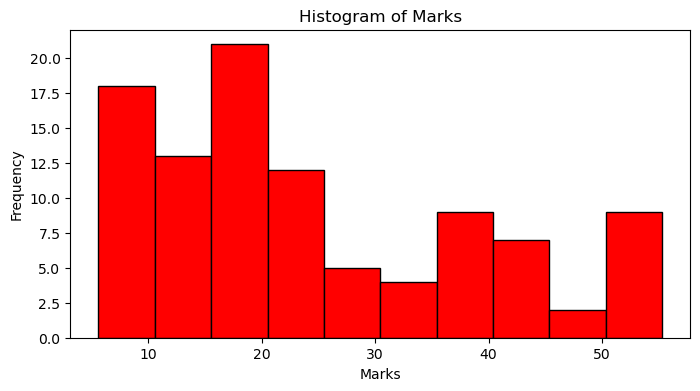

In [9]:
import matplotlib.pyplot as plt

# Plot histogram for "Marks"
plt.figure(figsize=(8, 4))
plt.hist(data['Marks'], bins=10, color='red', edgecolor='black')
plt.title('Histogram of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()


### Histogram of Study Time

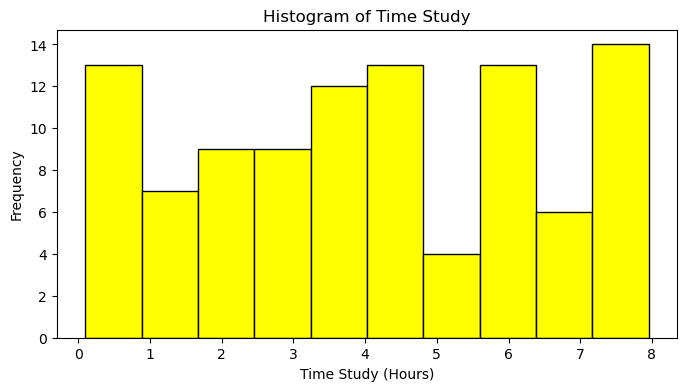

In [11]:
import matplotlib.pyplot as plt

# Plot histogram for "Time_study"
plt.figure(figsize=(8, 4))
plt.hist(data['time_study'], bins=10, color='yellow', edgecolor='black')
plt.title('Histogram of Time Study')
plt.xlabel('Time Study (Hours)')
plt.ylabel('Frequency')
plt.show()


# Cleaning data

In [13]:
missing_values = data.isnull().sum()

# Display missing values
print("Missing Values in the Dataset:")
print(missing_values)

Missing Values in the Dataset:
number_courses    0
time_study        0
Marks             0
dtype: int64


# Data Transformation

In [15]:
import numpy as np

# Creating a new binary column for classification
data['Pass/Fail'] = np.where(data['Marks'] >= 35, 1, 0)

# Display 
print(data.head(10))

   number_courses  time_study   Marks  Pass/Fail
0               3       4.508  19.202          0
1               4       0.096   7.734          0
2               4       3.133  13.811          0
3               6       7.909  53.018          1
4               8       7.811  55.299          1
5               6       3.211  17.822          0
6               3       6.063  29.889          0
7               5       3.413  17.264          0
8               4       4.410  20.348          0
9               3       6.173  30.862          0


# Classification Model

### Confusion matrix

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Features and target variable
X = data[['number_courses', 'time_study']]
y = data['Pass/Fail']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classification model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11  0]
 [ 0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [4]:
# Data Visualization
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

NameError: name 'data' is not defined